In [6]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install datetime

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import yfinance as yf

In [25]:
GOOG = yf.download('GOOG', '2019-07-14', '2020-07-15') 

[*********************100%***********************]  1 of 1 completed


In [27]:
GOOG.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-15,1146.859985,1150.819946,1139.400024,1150.339966,1150.339966,903800
2019-07-16,1146.000000,1158.579956,1145.000000,1153.579956,1153.579956,1238800
2019-07-17,1150.969971,1158.359985,1145.770020,1146.349976,1146.349976,1170000
2019-07-18,1141.739990,1147.604980,1132.729980,1146.329956,1146.329956,1291300
2019-07-19,1148.189941,1151.140015,1129.619995,1130.099976,1130.099976,1647200


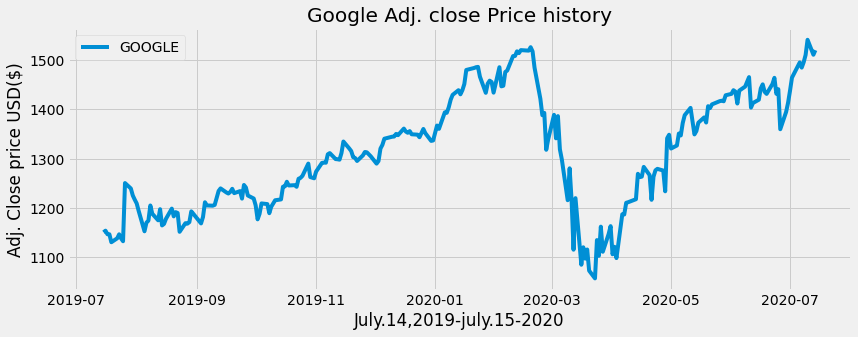

In [87]:
plt.figure(figsize=(12.5,4.5))
plt.plot(GOOG['Adj Close'], label='GOOGLE')
plt.title ("Google Adj. close Price history")
plt.xlabel('July.14,2019-july.15-2020')
plt.ylabel('Adj. Close price USD($)')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
plt.figure(figsize=(12.5,4.5))
plt.plot(GOOG['Adj Close'], label='GOOGLE')
plt.title ("Google Adj. close Price history")
plt.xlabel('July.14,2019-july.15-2020')
plt.ylabel('Adj. Close price USD($)')
plt.legend(loc = 'upper left')
plt.show()

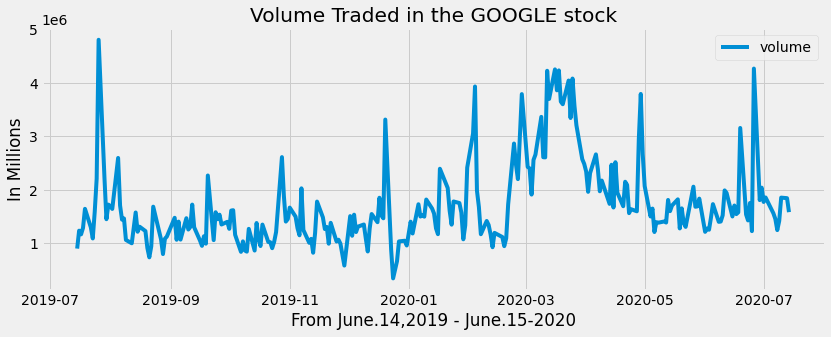

In [89]:

plt.figure(figsize = (12.5,4.5))
plt.plot(GOOG['Volume'], label = 'volume')
plt.title('Volume Traded in the GOOGLE stock')
plt.xlabel('From June.14,2019 - June.15-2020')
plt.ylabel('In Millions')
plt.legend(loc = 'upper right')
plt.show()

In [52]:
SMA30 = pd.DataFrame()
SMA30['Adj Close SMA30'] = GOOG['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close SMA30
Date,
2019-07-15,NaN
2019-07-16,NaN
2019-07-17,NaN
2019-07-18,NaN
2019-07-19,NaN
...,...
2020-07-08,1437.538660
2020-07-09,1440.643660
2020-07-10,1444.810661


In [54]:
SMA100=pd.DataFrame()
SMA100['Adj Close SMA100'] = GOOG['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close SMA100
Date,
2019-07-15,NaN
2019-07-16,NaN
2019-07-17,NaN
2019-07-18,NaN
2019-07-19,NaN
...,...
2020-07-08,1329.775649
2020-07-09,1329.678149
2020-07-10,1329.898849


In [61]:
data = pd.DataFrame()
data['GOOG']= GOOG['Adj Close']
data['SMA30'] = SMA30['Adj Close SMA30']
data['SMA100'] = SMA100['Adj Close SMA100']
data

,GOOG,SMA30,SMA100
Date,,,
2019-07-15,1150.339966,NaN,NaN
2019-07-16,1153.579956,NaN,NaN
2019-07-17,1146.349976,NaN,NaN
2019-07-18,1146.329956,NaN,NaN
2019-07-19,1130.099976,NaN,NaN
...,...,...,...
2020-07-08,1496.000000,1437.538660,1329.775649
2020-07-09,1510.989990,1440.643660,1329.678149
2020-07-10,1541.739990,1444.810661,1329.898849


In [83]:
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    
    for i in range (len(data)):
        if data['SMA30'][i]>data['SMA100'][i]:
            if flag !=1:
                sigPriceBuy.append(data['SMA100'][i])
                sigPriceSell.append(np.nan)
                flag=1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag !=0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['GOOG'][i])
                flag=0
            else: 
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else: 
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
            
    return (sigPriceBuy, sigPriceSell)            

In [84]:
buy_sell=buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [86]:
data

,GOOG,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2019-07-15,1150.339966,NaN,NaN,NaN,NaN
2019-07-16,1153.579956,NaN,NaN,NaN,NaN
2019-07-17,1146.349976,NaN,NaN,NaN,NaN
2019-07-18,1146.329956,NaN,NaN,NaN,NaN
2019-07-19,1130.099976,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-07-08,1496.000000,1437.538660,1329.775649,NaN,NaN
2020-07-09,1510.989990,1440.643660,1329.678149,NaN,NaN
2020-07-10,1541.739990,1444.810661,1329.898849,NaN,NaN


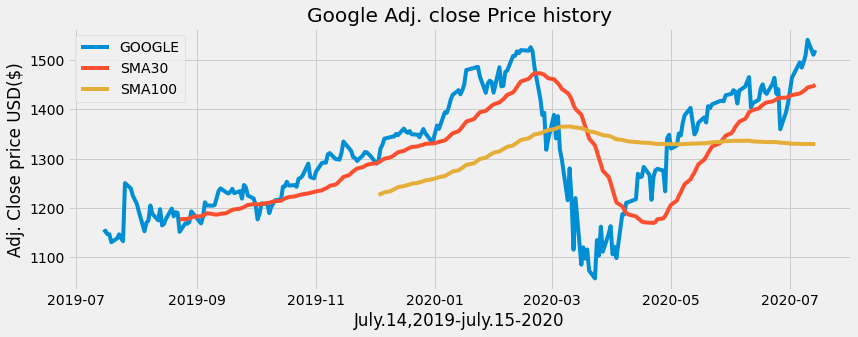

In [92]:
plt.figure(figsize=(12.5,4.5))
plt.plot(GOOG['Adj Close'], label='GOOGLE')

plt.plot(SMA30['Adj Close SMA30'], label = 'SMA30')
plt.plot(SMA100['Adj Close SMA100'], label = 'SMA100')


plt.title ("Google Adj. close Price history")
plt.xlabel('July.14,2019-july.15-2020')
plt.ylabel('Adj. Close price USD($)')
plt.legend(loc = 'upper left')
plt.show()


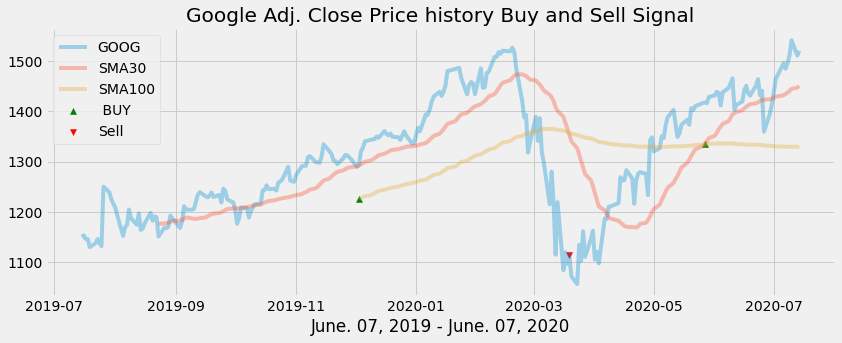

In [94]:
plt.figure(figsize=(12.6,4.6))
plt.plot (data['GOOG'], label = 'GOOG',alpha=0.35)
plt.plot(data['SMA30'], label= 'SMA30',alpha=0.35)
plt.plot(data['SMA100'], label = 'SMA100',alpha=0.35)

plt.scatter(data.index, data['Buy_Signal_Price'], label = ' BUY' ,marker='^', color = 'green')
plt.scatter(data.index,data['Sell_Signal_Price'],label = 'Sell', marker = 'v', color = 'red')
plt.title('Google Adj. Close Price history Buy and Sell Signal')
plt.xlabel('June. 07, 2019 - June. 07, 2020')
plt.legend(loc='upper left')
plt.show()